In [ ]:
from google.colab import files
uploaded = files.upload()

Saving crime_data.csv to crime_data (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [ ]:
data = pd.read_csv(r'crime_data.csv')

In [ ]:
data.head(10)

,Place,Murder,Assault,UrbanPop,Rape
0,0,13.2,236,58,21.2
1,1,10.0,263,48,44.5
2,2,8.1,294,80,31.0
3,3,8.8,190,50,19.5
4,4,9.0,276,91,40.6
5,5,7.9,204,78,38.7
6,6,3.3,110,77,11.1
7,7,5.9,238,72,15.8
8,8,15.4,335,80,31.9
9,9,17.4,211,60,25.8


In [ ]:
data = data.rename(columns={'Unnamed: 0': 'Place'})

In [ ]:
data.head()

,Place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
colname=[]
for x in data.columns:
    if data[x].dtypes=='object':
        colname.append(x)
colname        


['Place']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for x in colname:
    data[x]=le.fit_transform(data[x])
    
    
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)

Feature Place
mapping {'Alabama': 0, 'Alaska': 1, 'Arizona': 2, 'Arkansas': 3, 'California': 4, 'Colorado': 5, 'Connecticut': 6, 'Delaware': 7, 'Florida': 8, 'Georgia': 9, 'Hawaii': 10, 'Idaho': 11, 'Illinois': 12, 'Indiana': 13, 'Iowa': 14, 'Kansas': 15, 'Kentucky': 16, 'Louisiana': 17, 'Maine': 18, 'Maryland': 19, 'Massachusetts': 20, 'Michigan': 21, 'Minnesota': 22, 'Mississippi': 23, 'Missouri': 24, 'Montana': 25, 'Nebraska': 26, 'Nevada': 27, 'New Hampshire': 28, 'New Jersey': 29, 'New Mexico': 30, 'New York': 31, 'North Carolina': 32, 'North Dakota': 33, 'Ohio': 34, 'Oklahoma': 35, 'Oregon': 36, 'Pennsylvania': 37, 'Rhode Island': 38, 'South Carolina': 39, 'South Dakota': 40, 'Tennessee': 41, 'Texas': 42, 'Utah': 43, 'Vermont': 44, 'Virginia': 45, 'Washington': 46, 'West Virginia': 47, 'Wisconsin': 48, 'Wyoming': 49}


In [ ]:
data.shape

(50, 5)

In [ ]:
data.isnull().sum()

Place       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [ ]:
data.dtypes

Place         int64
Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

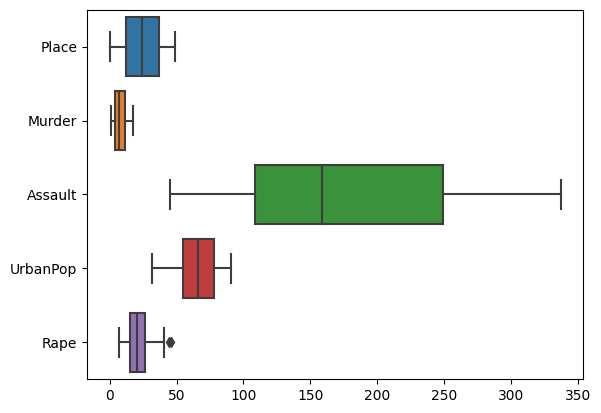

In [ ]:
sns.boxplot(data=data, orient="h")
plt.show()

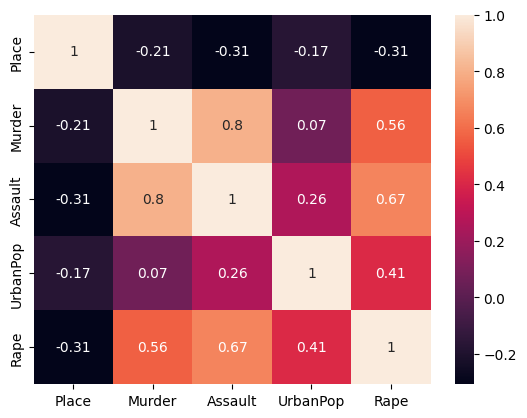

In [ ]:
sns.heatmap(data.corr(), annot=True)
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Place     50 non-null     int64  
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(3)
memory usage: 2.1 KB


In [ ]:
Data1 = data[['Place','Murder']]

In [ ]:
# standardize the data
scaler = StandardScaler()
scaled_data1 = scaler.fit_transform(Data1)


In [ ]:
# perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data1)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [ ]:
# add the cluster labels to the original data
Data1['clusters'] = kmeans.labels_


<ipython-input-18-14eb5aafb4d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data1['clusters'] = kmeans.labels_


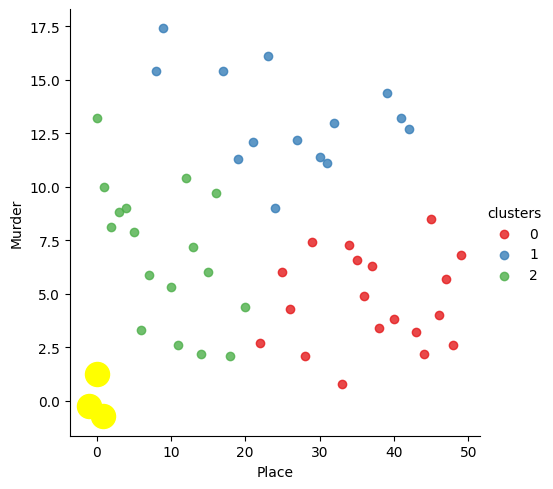

In [ ]:
# plot a scatter plot with cluster labels and centroids
sns.lmplot(data=Data1, x='Place', y='Murder', fit_reg=False, hue='clusters', palette='Set1')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow')
plt.show()

In [ ]:
Data2 = data[['Place','Assault']]

In [ ]:
# standardize the data
scaler = StandardScaler()
scaled_data2 = scaler.fit_transform(Data2)


In [ ]:
# perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data2)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [ ]:
# add the cluster labels to the original data
Data2['clusters'] = kmeans.labels_


<ipython-input-23-9ee17bd22e18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data2['clusters'] = kmeans.labels_


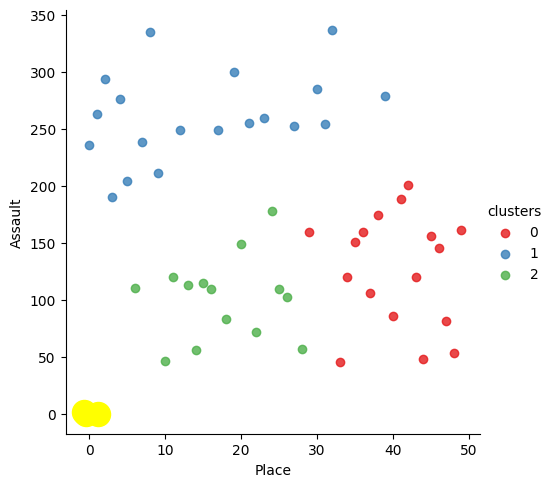

In [ ]:
# plot a scatter plot with cluster labels and centroids
sns.lmplot(data=Data2, x='Place', y='Assault', fit_reg=False, hue='clusters', palette='Set1')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow')
plt.show()

In [ ]:
Data3 = data[['Place','Rape']]


In [ ]:
# standardize the data
scaler = StandardScaler()
scaled_data3 = scaler.fit_transform(Data3)


In [ ]:
# perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data3)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [ ]:
# add the cluster labels to the original data
Data3['clusters'] = kmeans.labels_

<ipython-input-28-2789b41d2f8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data3['clusters'] = kmeans.labels_


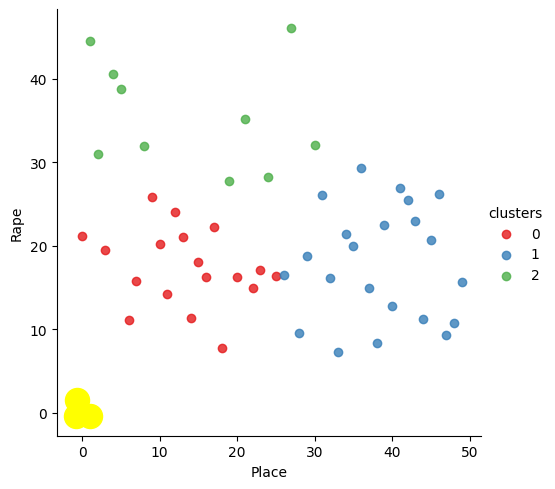

In [ ]:
# plot a scatter plot with cluster labels and centroids
sns.lmplot(data=Data3, x='Place', y='Rape', fit_reg=False, hue='clusters', palette='Set1')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow')
plt.show()